<a href="https://colab.research.google.com/github/nemodesouza/TCC-AIX/blob/main/analise_concordancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UNIVERSIDADE FEDERAL DE SANTA CATARINA
# CENTRO TECNOLÓGICO
# DEPARTAMENTO DE INFORMÁTICA E ESTATÍSTICA
# GRADUAÇÃO EM SISTEMAS DE INFORMAÇÃO
# TRABALHO DE CONCLUSÃO DE CURSO
# AUTOR: NEMO DE SOUZA

# PA1 = Análise de Concordância entre Avaliadores
# Script para cálculo do Kappa de Cohen e Kappa de Fleiss


# Instalar bibliotecas necessárias (se ainda não estiverem instalados)
if (!requireNamespace("irr", quietly = TRUE)) {                     # Para cálculo dos coeficientes kappa
  install.packages("irr")
}
if (!requireNamespace("dplyr", quietly = TRUE)) {                   # Para manipulação de dados
  install.packages("dplyr")
}
if (!requireNamespace("tidyr", quietly = TRUE)) {                   # Para transformação de dados
  install.packages("tidyr")
}
if (!requireNamespace("ggplot2", quietly = TRUE)) {                 # Para visualização
  install.packages("ggplot2")
}
if (!requireNamespace("reshape2", quietly = TRUE)) {                # Para manipulação de dados em formato de matriz
  install.packages("reshape2")
}

# Carregar bibliotecas
library(irr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)

In [ ]:
# Definir diretório de trabalho e carregar dados

### OBS: antes de executar, carregue os arquivos (de mesmo nome) na pasta do Colab (barra lateral "Arquivos")

dados <- read.csv("PA1 - respostas_checklist - horizontal.csv", stringsAsFactors = FALSE)
matriz_heuristicas <- read.csv("matriz_heuristicas_e_itens_checklist.csv", stringsAsFactors = FALSE)


In [ ]:
# Examinar a estrutura dos dados
str(dados)
head(dados)

'data.frame':	14 obs. of  25 variables:
 $ ID : int  1 2 3 4 5 6 7 1 2 3 ...
 $ App: chr  "Raymond's Flag Detector" "Raymond's Flag Detector" "Raymond's Flag Detector" "Raymond's Flag Detector" ...
 $ c1 : int  1 1 0 0 1 1 1 1 1 1 ...
 $ c2 : int  0 0 0 0 0 0 0 1 1 1 ...
 $ c3 : int  0 0 1 0 1 1 1 1 1 1 ...
 $ c4 : int  0 0 0 0 0 0 0 1 1 1 ...
 $ c5 : int  0 0 0 0 0 0 0 1 1 1 ...
 $ c6 : int  0 0 0 0 0 0 0 1 1 1 ...
 $ c7 : int  NA 0 NA NA 0 0 1 1 1 1 ...
 $ c8 : int  NA 1 0 0 0 0 1 1 1 1 ...
 $ c9 : int  NA 0 0 0 0 0 NA 1 0 1 ...
 $ c10: int  0 0 0 0 0 0 0 1 0 1 ...
 $ c11: int  0 0 0 0 0 0 0 1 0 0 ...
 $ c12: int  0 1 0 0 0 0 1 1 1 1 ...
 $ c13: int  0 0 0 0 0 0 0 1 1 1 ...
 $ c14: int  0 0 0 NA 0 0 0 1 0 1 ...
 $ c15: int  0 0 0 0 0 0 0 0 0 1 ...
 $ c16: int  NA 0 0 NA NA 0 NA 0 0 NA ...
 $ c17: int  NA NA 0 0 NA 0 0 0 0 0 ...
 $ c18: int  0 0 0 0 NA 0 0 NA 0 0 ...
 $ c19: int  NA 0 NA NA NA NA NA NA 0 NA ...
 $ c20: int  1 1 1 1 0 0 1 1 0 1 ...
 $ c21: int  NA 0 0 0 0 0 NA NA 1 1 .

,ID,App,c1,c2,c3,c4,c5,c6,c7,c8,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Raymond's Flag Detector,1,0,0,0,0,0,NA,NA,⋯,0,0,NA,NA,0,NA,1,NA,NA,NA
2,2,Raymond's Flag Detector,1,0,0,0,0,0,0,1,⋯,0,0,0,NA,0,0,1,0,0,NA
3,3,Raymond's Flag Detector,0,0,1,0,0,0,NA,0,⋯,0,0,0,0,0,NA,1,0,0,NA
4,4,Raymond's Flag Detector,0,0,0,0,0,0,NA,0,⋯,NA,0,NA,0,0,NA,1,0,0,NA
5,5,Raymond's Flag Detector,1,0,1,0,0,0,0,0,⋯,0,0,NA,NA,NA,NA,0,0,0,NA
6,6,Raymond's Flag Detector,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,NA,0,0,0,NA


In [ ]:
# Dados dos apps
app1_data <- dados[1:7, 3:25]  # Raymond's Flag Detector
app2_data <- dados[8:14, 3:25] # AI Dermatologist

# Converter para matrizes numéricafs
app1_matrix <- as.matrix(app1_data)
app2_matrix <- as.matrix(app2_data)

# Converter para numérico
app1_matrix <- apply(app1_matrix, 2, function(x) as.numeric(as.character(x)))
app2_matrix <- apply(app2_matrix, 2, function(x) as.numeric(as.character(x)))

# Nomear linhas e colunas
rownames(app1_matrix) <- paste0("Av. ", 1:7)
colnames(app1_matrix) <- paste0("c", 1:23)
rownames(app2_matrix) <- paste0("Av. ", 1:7)
colnames(app2_matrix) <- paste0("c", 1:23)

# Verificar dimensões
cat("Dimensões App1:", dim(app1_matrix), "\n")
cat("Dimensões App2:", dim(app2_matrix), "\n")

Dimensões App1: 7 23 
Dimensões App2: 7 23 


In [ ]:
# Calcular porcentagem de NA por item
na_percentages_app1 <- colSums(is.na(app1_matrix)) / nrow(app1_matrix) * 100
na_percentages_app2 <- colSums(is.na(app2_matrix)) / nrow(app2_matrix) * 100

# Identificar itens com mais de 30% de NA
high_na_items_app1 <- names(na_percentages_app1[na_percentages_app1 > 30])
high_na_items_app2 <- names(na_percentages_app2[na_percentages_app2 > 30])

cat("Itens com >30% NA - App1:", high_na_items_app1, "\n")
cat("Itens com >30% NA - App2:", high_na_items_app2, "\n")

Itens com >30% NA - App1: c7 c16 c17 c19 c23 
Itens com >30% NA - App2: c19 


In [ ]:
# Remover itens com excesso de NA
if(length(high_na_items_app1) > 0) {
  app1_matrix_filtered <- app1_matrix[, !colnames(app1_matrix) %in% high_na_items_app1, drop = FALSE]
} else {
  app1_matrix_filtered <- app1_matrix
}

if(length(high_na_items_app2) > 0) {
  app2_matrix_filtered <- app2_matrix[, !colnames(app2_matrix) %in% high_na_items_app2, drop = FALSE]
} else {
  app2_matrix_filtered <- app2_matrix
}

# Função melhorada para interpretar kappa (seguindo McHugh, 2012)
interpretar_kappa <- function(k) {
  if(is.na(k)) return("Não Aplicável")
  else if(k <= 0.20) return("Nenhuma (0-20%)")
  else if(k <= 0.39) return("Mínima (21-39%)")
  else if(k <= 0.59) return("Fraca (40-59%)")
  else if(k <= 0.79) return("Moderada (60-79%)")
  else if(k <= 0.90) return("Forte (80-90%)")
  else return("Quase Perfeita (91-100%)")
}

# Função para calcular Kappa de Cohen entre dois avaliadores
calcular_kappa_cohen <- function(matriz, avaliador1, avaliador2) {

  # Extrair dados dos dois avaliadores
  ratings <- matriz[c(avaliador1, avaliador2), , drop = FALSE]
  ratings <- t(ratings)  # Transpor para formato correto (itens x avaliadores)
  ratings <- ratings[complete.cases(ratings), , drop = FALSE]

  if(nrow(ratings) < 2) return(NA)

  k <- try(kappa2(ratings)$value, silent = TRUE)
  return(ifelse(inherits(k, "try-error"), NA, k))
}

# Calcular matrizes de Kappa de Cohen
kappas_app1 <- matrix(NA, nrow = 7, ncol = 7)
kappas_app2 <- matrix(NA, nrow = 7, ncol = 7)
rownames(kappas_app1) <- colnames(kappas_app1) <- paste0("Avaliador_", 1:7)
rownames(kappas_app2) <- colnames(kappas_app2) <- paste0("Avaliador_", 1:7)

# Preencher matrizes de concordância
for(i in 1:7) {
  kappas_app1[i, i] <- kappas_app2[i, i] <- 1.0  # Diagonal = 1 (concordância perfeita consigo mesmo)
  for(j in 1:7) {
    if(i != j) {
      kappas_app1[i, j] <- calcular_kappa_cohen(app1_matrix_filtered, i, j)
      kappas_app2[i, j] <- calcular_kappa_cohen(app2_matrix_filtered, i, j)
    }
  }
}
# Calcular estatísticas por avaliador
stats_por_avaliador_app1 <- data.frame(
  Avaliador = paste0("Av. ", 1:7),
  Media_Concordancia = sapply(1:7, function(i) mean(kappas_app1[i, -i], na.rm = TRUE)),
  stringsAsFactors = FALSE
)
stats_por_avaliador_app1$Interpretacao <- sapply(stats_por_avaliador_app1$Media_Concordancia, interpretar_kappa)

stats_por_avaliador_app2 <- data.frame(
  Avaliador = paste0("Av. ", 1:7),
  Media_Concordancia = sapply(1:7, function(i) mean(kappas_app2[i, -i], na.rm = TRUE)),
  stringsAsFactors = FALSE
)
stats_por_avaliador_app2$Interpretacao <- sapply(stats_por_avaliador_app2$Media_Concordancia, interpretar_kappa)


In [ ]:
# Função para calcular Kappa de Fleiss
calcular_fleiss <- function(matriz) {
  cat("Calculando Fleiss para matriz de dimensão:", dim(matriz), "\n")

  # Verificar se há dados válidos
  if(nrow(matriz) == 0 || ncol(matriz) == 0) {
    cat("Matriz vazia - retornando valores padrão\n")
    return(list(kappa = NA, ic_lower = NA, ic_upper = NA, p_value = NA, n_itens = 0))
  }

  # Transpor matriz para formato correto (itens nas linhas, avaliadores nas colunas)
  matriz_t <- t(matriz)
  cat("Matriz transposta - dimensão:", dim(matriz_t), "\n")

  # Remover linhas com qualquer NA
  matriz_completa <- matriz_t[complete.cases(matriz_t), , drop = FALSE]
  cat("Itens completos após remoção de NA:", nrow(matriz_completa), "\n")

  if(nrow(matriz_completa) < 2) {
    cat("Insuficientes itens completos - retornando valores padrão\n")
    return(list(kappa = NA, ic_lower = NA, ic_upper = NA, p_value = NA, n_itens = nrow(matriz_completa)))
  }

  # Verificar se há variabilidade nos dados
  if(length(unique(as.vector(matriz_completa))) < 2) {
    cat("Sem variabilidade nos dados - retornando valores padrão\n")
    return(list(kappa = NA, ic_lower = NA, ic_upper = NA, p_value = NA, n_itens = nrow(matriz_completa)))
  }

  # Tentar calcular Fleiss kappa
  resultado <- tryCatch({
    fleiss_result <- kappam.fleiss(matriz_completa, exact = FALSE)
    list(
      kappa = fleiss_result$value,
      ic_lower = fleiss_result$confid[1],
      ic_upper = fleiss_result$confid[2],
      p_value = fleiss_result$p.value,
      n_itens = nrow(matriz_completa)
    )
  }, error = function(e) {
    cat("Erro no cálculo de Fleiss:", e$message, "\n")
    list(kappa = NA, ic_lower = NA, ic_upper = NA, p_value = NA, n_itens = nrow(matriz_completa))
  })

  return(resultado)
}


In [ ]:
# Calcular Fleiss para ambos apps
cat("Calculando Kappa de Fleiss...\n")
fleiss_app1 <- calcular_fleiss(app1_matrix_filtered)
fleiss_app2 <- calcular_fleiss(app2_matrix_filtered)

cat("Resultado Fleiss App1:", str(fleiss_app1), "\n")
cat("Resultado Fleiss App2:", str(fleiss_app2), "\n")

# Função auxiliar para extrair valores com segurança
extrair_valor <- function(lista, chave, padrao = NA) {
  if(is.null(lista) || is.null(lista[[chave]])) {
    return(padrao)
  }
  return(lista[[chave]])
}

Calculando Kappa de Fleiss...
Calculando Fleiss para matriz de dimensão: 7 18 
Matriz transposta - dimensão: 18 7 
Itens completos após remoção de NA: 12 
Calculando Fleiss para matriz de dimensão: 7 22 
Matriz transposta - dimensão: 22 7 
Itens completos após remoção de NA: 15 
List of 5
 $ kappa   : num 0.46
 $ ic_lower: NULL
 $ ic_upper: NULL
 $ p_value : num 2.98e-13
 $ n_itens : int 12
Resultado Fleiss App1: 
List of 5
 $ kappa   : num 0.202
 $ ic_lower: NULL
 $ ic_upper: NULL
 $ p_value : num 0.000337
 $ n_itens : int 15
Resultado Fleiss App2: 


In [ ]:
# Criar resumo dos resultados Fleiss com tratamento seguro
fleiss_results <- data.frame(
  App = c("Raymond's Flag Detector", "AI Dermatologist - Skin Scanner"),
  Kappa = c(
    extrair_valor(fleiss_app1, "kappa"),
    extrair_valor(fleiss_app2, "kappa")
  ),
  IC_Lower = c(
    extrair_valor(fleiss_app1, "ic_lower"),
    extrair_valor(fleiss_app2, "ic_lower")
  ),
  IC_Upper = c(
    extrair_valor(fleiss_app1, "ic_upper"),
    extrair_valor(fleiss_app2, "ic_upper")
  ),
  p_value = c(
    extrair_valor(fleiss_app1, "p_value"),
    extrair_valor(fleiss_app2, "p_value")
  ),
  N_Itens = c(
    extrair_valor(fleiss_app1, "n_itens", 0),
    extrair_valor(fleiss_app2, "n_itens", 0)
  ),
  stringsAsFactors = FALSE
)

fleiss_results$Interpretacao <- sapply(fleiss_results$Kappa, interpretar_kappa)


In [ ]:
# Estatísticas gerais do Kappa de Cohen
stats_geral <- data.frame(
  App = c("Raymond's Flag Detector", "AI Dermatologist - Skin Scanner"),
  Media_Kappa = c(
    mean(kappas_app1[lower.tri(kappas_app1)], na.rm = TRUE),
    mean(kappas_app2[lower.tri(kappas_app2)], na.rm = TRUE)
  ),
  Mediana_Kappa = c(
    median(kappas_app1[lower.tri(kappas_app1)], na.rm = TRUE),
    median(kappas_app2[lower.tri(kappas_app2)], na.rm = TRUE)
  ),
  DP_Kappa = c(
    sd(kappas_app1[lower.tri(kappas_app1)], na.rm = TRUE),
    sd(kappas_app2[lower.tri(kappas_app2)], na.rm = TRUE)
  ),
  Min_Kappa = c(
    min(kappas_app1[lower.tri(kappas_app1)], na.rm = TRUE),
    max(kappas_app1[lower.tri(kappas_app1)], na.rm = TRUE)
  ),
  Max_Kappa = c(
    min(kappas_app2[lower.tri(kappas_app2)], na.rm = TRUE),
    max(kappas_app2[lower.tri(kappas_app2)], na.rm = TRUE)
  )
)

stats_geral$Interpretacao <- sapply(stats_geral$Media_Kappa, interpretar_kappa)


In [ ]:
# Função heatmap
criar_heatmap <- function(matriz_kappa, titulo_app) {
  melted <- reshape2::melt(matriz_kappa)
  names(melted) <- c("Avaliador1", "Avaliador2", "Kappa")

  ggplot(melted, aes(x = Avaliador1, y = Avaliador2, fill = Kappa)) +
    geom_tile(color = "white", linewidth = 0.5) +
    geom_text(aes(label = round(Kappa, 3)), color = "black", size = 3) +
    scale_fill_gradient2(low = "#d73027", mid = "white", high = "#1a9850",
                         midpoint = 0.5, limits = c(-1, 1), na.value = "grey90",
                         name = "Kappa") +
    scale_y_discrete(limits = rev) +
    labs(title = "Matriz de Concordância - Kappa de Cohen",
         subtitle = titulo_app,
         x = "Avaliador", y = "Avaliador") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
          axis.text.y = element_text(size = 10),
          plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
          plot.subtitle = element_text(hjust = 0.5, size = 12))
}




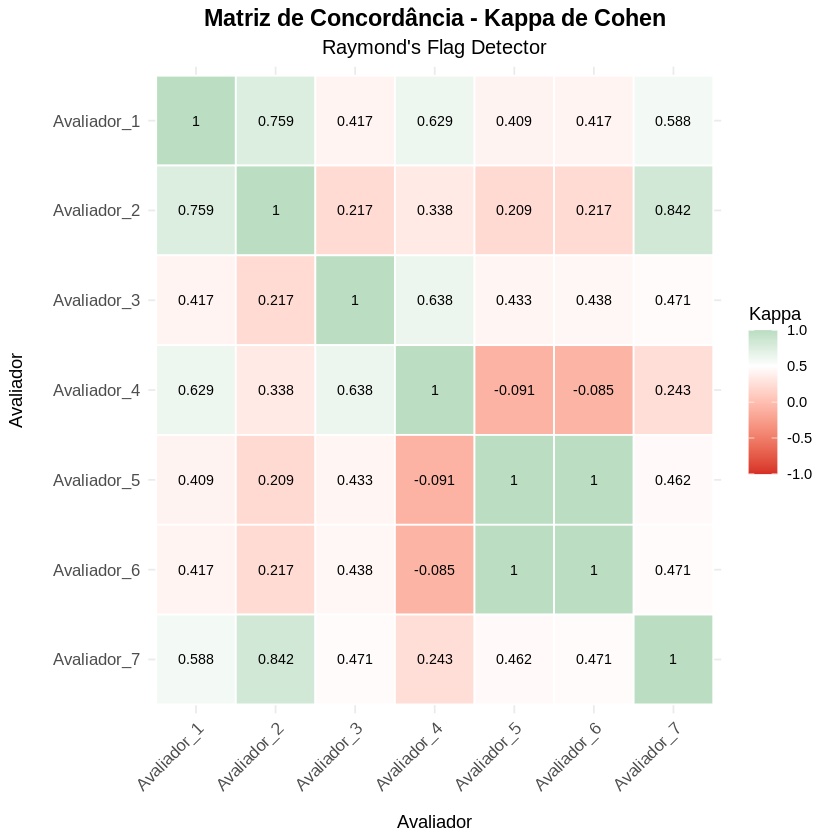

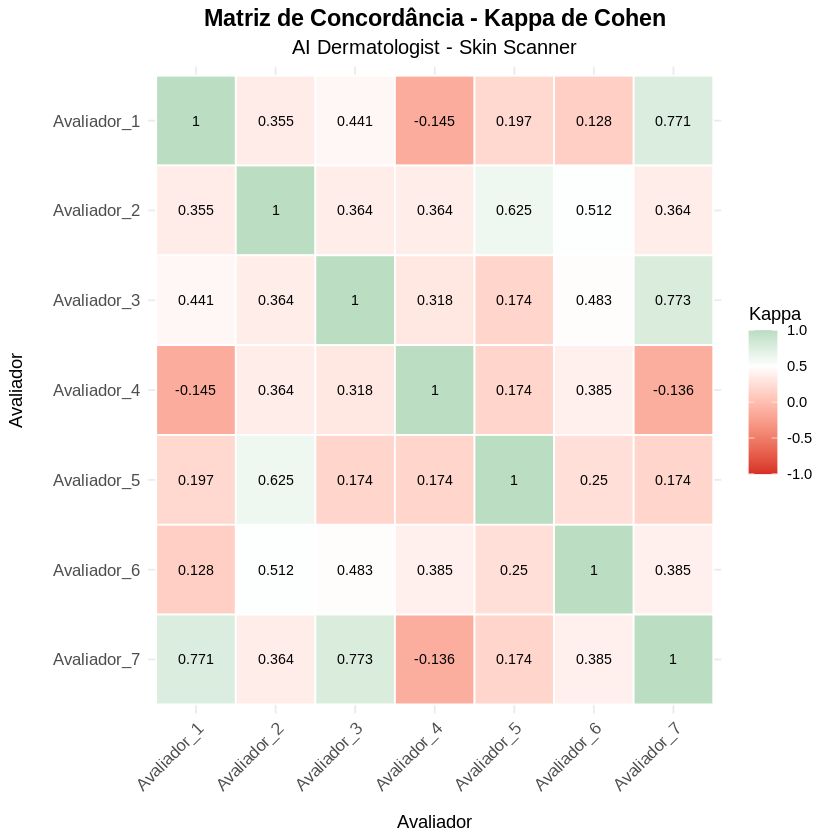

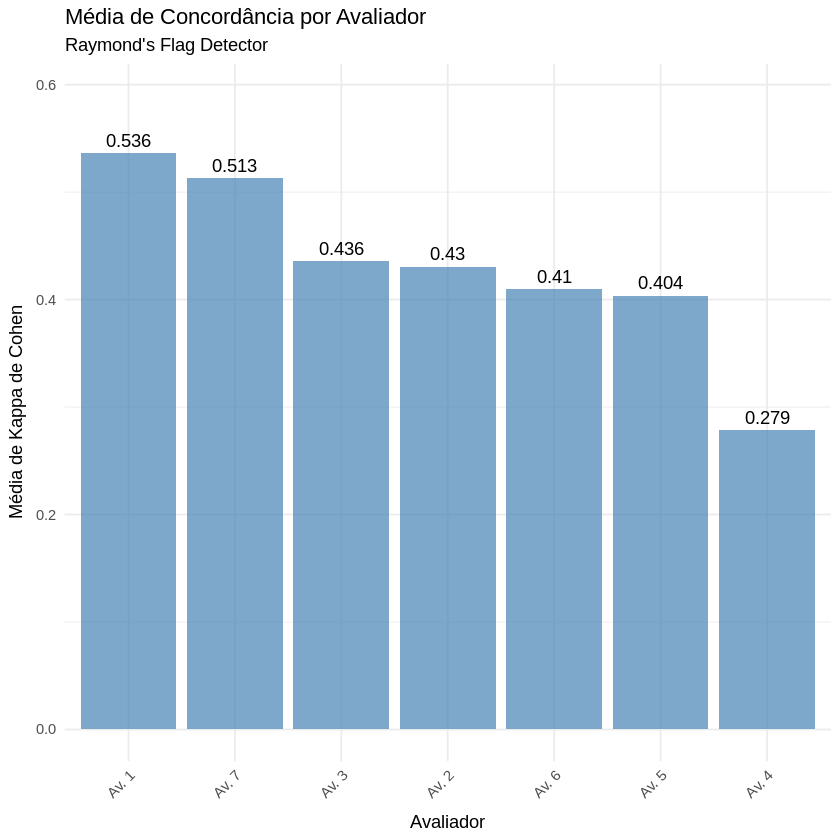

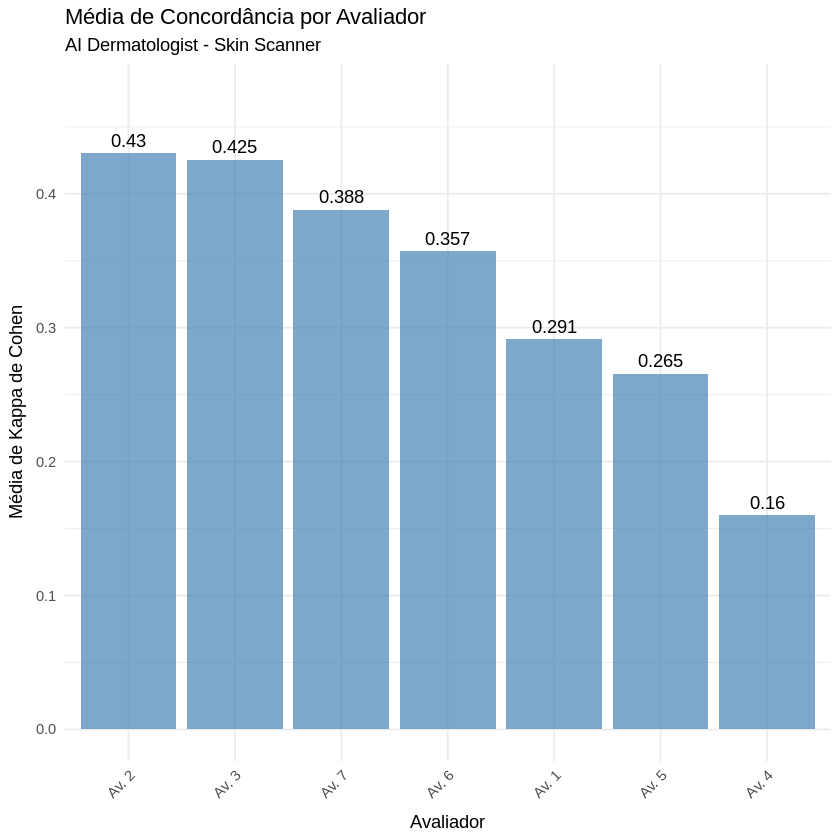

In [ ]:
# Criar visualizações
p1 <- criar_heatmap(kappas_app1, "Raymond's Flag Detector")
p2 <- criar_heatmap(kappas_app2, "AI Dermatologist - Skin Scanner")

  #Visualizar plot
  plot(p1)
  plot(p2)

# Gráficos de barras para média de concordância por avaliador
p3 <- ggplot(stats_por_avaliador_app1, aes(x = reorder(Avaliador, -Media_Concordancia),
                                           y = Media_Concordancia)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = round(Media_Concordancia, 3)), vjust = -0.5) + #, size = 3) +
  labs(title = "Média de Concordância por Avaliador",
       subtitle = "Raymond's Flag Detector",
       x = "Avaliador", y = "Média de Kappa de Cohen") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ylim(0, max(stats_por_avaliador_app1$Media_Concordancia) * 1.1)

  #Visualizar plot
  plot(p3)

p4 <- ggplot(stats_por_avaliador_app2, aes(x = reorder(Avaliador, -Media_Concordancia),
                                           y = Media_Concordancia)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = round(Media_Concordancia, 3)), vjust = -0.5) + #, size = 3) +
  labs(title = "Média de Concordância por Avaliador",
       subtitle = "AI Dermatologist - Skin Scanner",
       x = "Avaliador", y = "Média de Kappa de Cohen") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ylim(0, max(stats_por_avaliador_app2$Media_Concordancia) * 1.1)

  #Visualizar plot
  plot(p4)

In [ ]:
# Salvar resultados em arquivos CSV
write.csv(fleiss_results, "resultados_kappa_fleiss.csv", row.names = FALSE)
write.csv(stats_geral, "estatisticas_gerais_cohen.csv", row.names = FALSE)
write.csv(stats_por_avaliador_app1, "stats_avaliador_app1.csv", row.names = FALSE)
write.csv(stats_por_avaliador_app2, "stats_avaliador_app2.csv", row.names = FALSE)
write.csv(kappas_app1, "matriz_kappa_cohen_app1.csv")
write.csv(kappas_app2, "matriz_kappa_cohen_app2.csv")

#OBS: os arquivos gerados estarão disponíveis para download na lateral, no menu "Arquivos"

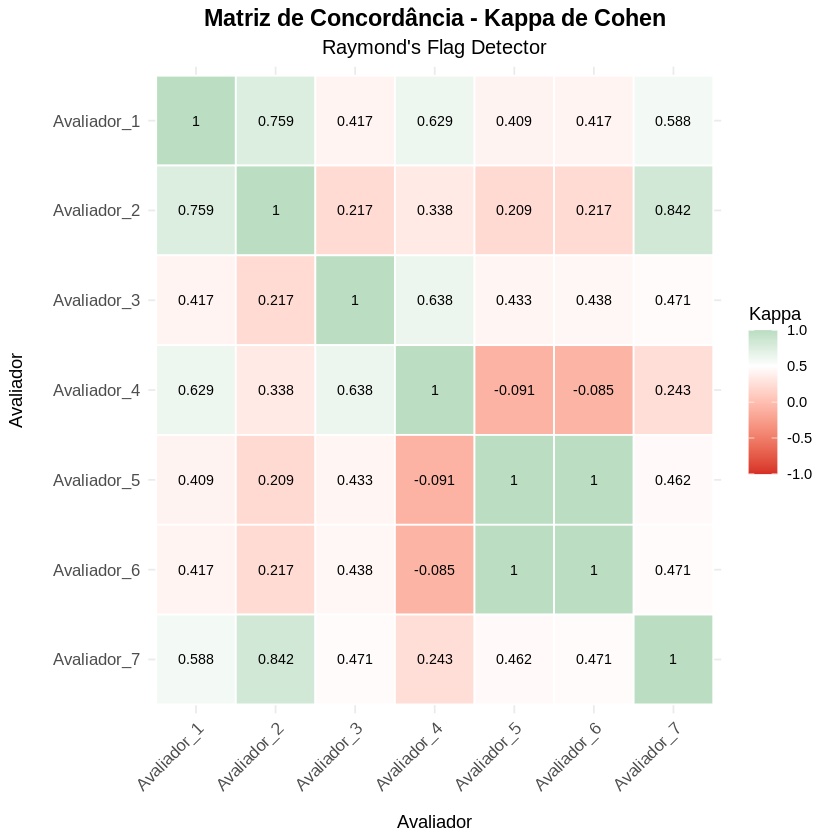

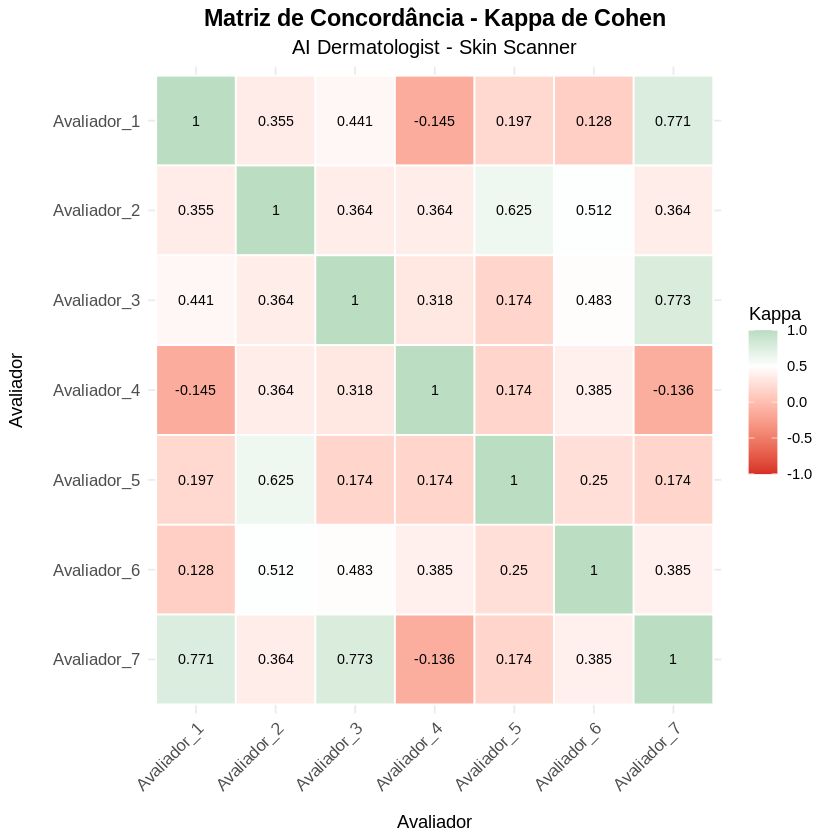

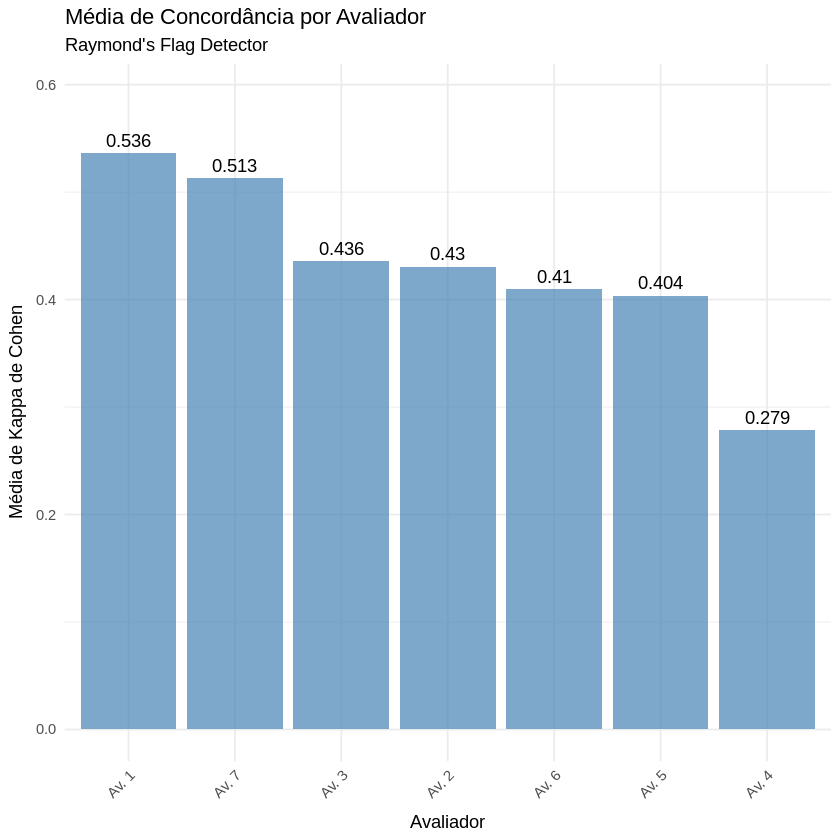

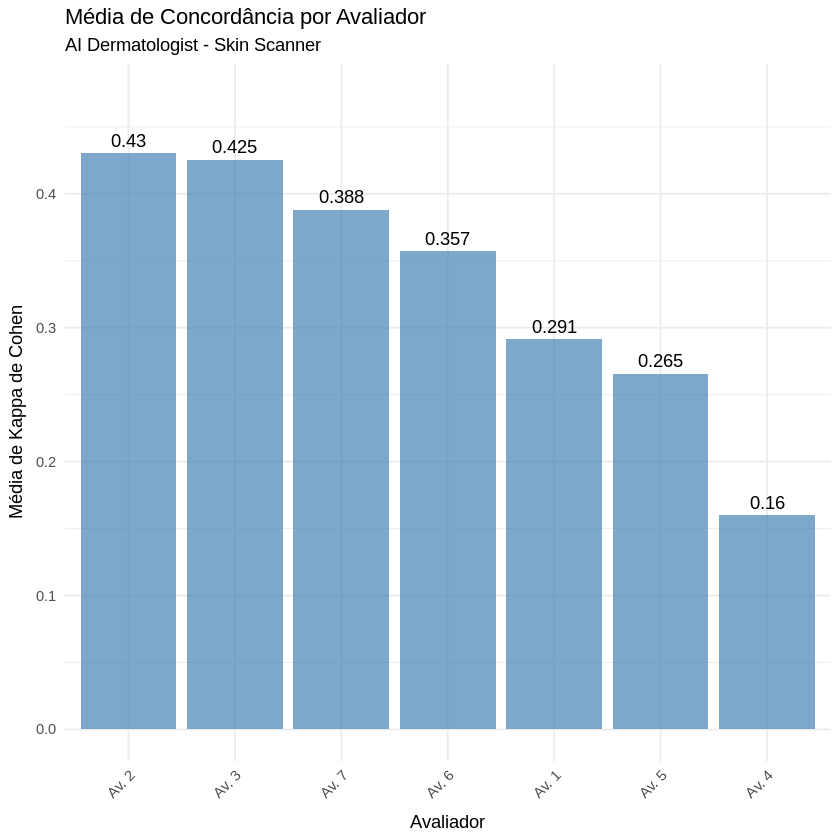

In [ ]:
# Salvar gráficos
# Imprimir o gráfico antes de salvar para garantir que o objeto está disponível
plot(p1)
ggsave("heatmap_app1.png", p1, width = 10, height = 8, dpi = 300)

plot(p2)
ggsave("heatmap_app2.png", p2, width = 10, height = 8, dpi = 300)

plot(p3)
ggsave("barras_concordancia_app1.png", p3, width = 10, height = 6, dpi = 300)

plot(p4)
ggsave("barras_concordancia_app2.png", p4, width = 10, height = 6, dpi = 300)

#OBS: os arquivos gerados estarão disponíveis para download na lateral, no menu "Arquivos"

In [ ]:
# Exibir todos os resultados em tela de prompt
cat("\n=== RESULTADOS DA ANÁLISE DE CONCORDÂNCIA ===\n")

cat("\n--- 1. KAPPA DE FLEISS (Concordância Geral) ---\n")
print(fleiss_results)

cat("\n--- 2. ESTATÍSTICAS GERAIS DO KAPPA DE COHEN ---\n")
print(stats_geral)

cat("\n--- 3. CONCORDÂNCIA MÉDIA POR AVALIADOR (Raymond's Flag Detector) ---\n")
print(stats_por_avaliador_app1)

cat("\n--- 4. CONCORDÂNCIA MÉDIA POR AVALIADOR (AI Dermatologist) ---\n")
print(stats_por_avaliador_app2)

cat("\n--- 5. RESUMO DE ITENS ANALISADOS ---\n")
cat("App1 - Itens com >30% NA removidos:", length(high_na_items_app1), "\n")
cat("App1 - Itens restantes para análise:", ncol(app1_matrix_filtered), "\n")
cat("App2 - Itens com >30% NA removidos:", length(high_na_items_app2), "\n")
cat("App2 - Itens restantes para análise:", ncol(app2_matrix_filtered), "\n")


=== RESULTADOS DA ANÁLISE DE CONCORDÂNCIA ===

--- 1. KAPPA DE FLEISS (Concordância Geral) ---
                              App     Kappa IC_Lower IC_Upper      p_value
1         Raymond's Flag Detector 0.4595588       NA       NA 2.979839e-13
2 AI Dermatologist - Skin Scanner 0.2020148       NA       NA 3.365518e-04
  N_Itens   Interpretacao
1      12  Fraca (40-59%)
2      15 Mínima (21-39%)

--- 2. ESTATÍSTICAS GERAIS DO KAPPA DE COHEN ---
                              App Media_Kappa Mediana_Kappa  DP_Kappa
1         Raymond's Flag Detector   0.4295609     0.4333333 0.2678547
2 AI Dermatologist - Skin Scanner   0.3310894     0.3636364 0.2384508
    Min_Kappa  Max_Kappa   Interpretacao
1 -0.09090909 -0.1445783  Fraca (40-59%)
2  1.00000000  0.7727273 Mínima (21-39%)

--- 3. CONCORDÂNCIA MÉDIA POR AVALIADOR (Raymond's Flag Detector) ---
  Avaliador Media_Concordancia   Interpretacao
1     Av. 1          0.5363086  Fraca (40-59%)
2     Av. 2          0.4304122  Fraca (40-59%)
3     